# Curso de Data Science - Digital House - Desafío 1

#### GRUPO 5: Lucas / César / Miguel / Ignacio / Aldo. 
#### Fecha de entrega: 18/07/2020.


In [1]:
#Importar las librerías necesarias para iniciar la Limpieza de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#Leer el archivo comprimido 
path_name = r"C:\Users\aacosta\Documents\Digital House - Documentos\Desafío"
path_name = r"https://drive.google.com/file/d/1MsZzoVm4jFZ5kk6KU8irvA8n9NikkDtw/view?usp=sharing"
file_name = path_name + "\properati.zip"
file_name = path_name + "/properati.zip"
data = pd.read_csv(file_name, compression='zip')

BadZipFile: File is not a zip file

In [3]:
#Comprobar las dimensiones del DataFrame
data.shape 
#out (121220,26)
#Calcular la cantidad total de filas del DataFrame. Esta variable será útil para los cálculos posteriores.
filas_totales = data.shape[0]
print(f"Cantidad de filas del DataFrame: {filas_totales}")
#out->Cantidad de filas del DataFrame: 121220

Cantidad de filas del DataFrame: 121220


In [4]:
#Copiar el archivo csv y trabajar con la copia
data.to_csv(path_name + '\properati_copia_01_original.csv')

In [5]:
#Realizar una descripción general de las columnas
print("--- ### ---")
print(f"Descripción general de las columnas: \n{data.describe}")

--- ### ---
Descripción general de las columnas: 
<bound method NDFrame.describe of         Unnamed: 0 operation property_type       place_name  \
0                0      sell            PH        Mataderos   
1                1      sell     apartment         La Plata   
2                2      sell     apartment        Mataderos   
3                3      sell            PH          Liniers   
4                4      sell     apartment           Centro   
...            ...       ...           ...              ...   
121215      121215      sell     apartment         Belgrano   
121216      121216      sell         house           Beccar   
121217      121217      sell     apartment    Villa Urquiza   
121218      121218      sell     apartment      Plaza Colón   
121219      121219      sell     apartment  Capital Federal   

                                  place_with_parent_names country_name  \
0                   |Argentina|Capital Federal|Mataderos|    Argentina   
1          

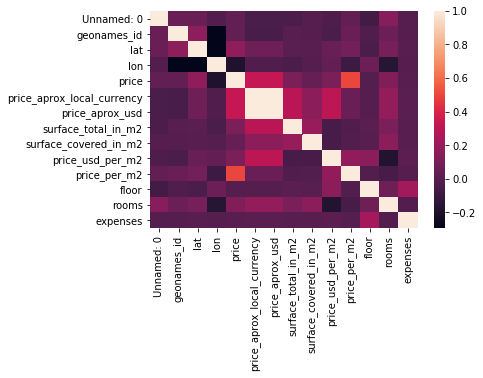

In [6]:
#Estimar los campos a considerar en nuestro análisis estableciendo la correlación entre ellos
correlacion = data.corr()
sns.heatmap(correlacion, 
               xticklabels=correlacion.columns.values,
               yticklabels=correlacion.columns.values)

In [7]:
#Comprobar los nombres de columnas  
print(data.columns)
#Comprobar los tipos de columnas
print(data.dtypes)

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')
Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float

In [8]:
#Crear la columna new_ID con el número de fila del DataFrame
data['_id'] = [x + 1 for x in range(data.shape[0])]
#Comprobamos el diseño de la nueva columna '_id'
print("--- ### ---")
print("Nuevo campo \'_id' con valores consecutivos de filas.")
print(data._id)

--- ### ---
Nuevo campo '_id' con valores consecutivos de filas.
0              1
1              2
2              3
3              4
4              5
           ...  
121215    121216
121216    121217
121217    121218
121218    121219
121219    121220
Name: _id, Length: 121220, dtype: int64


In [9]:
#Crear la columna '_delete' para marcar lógicamente los registros borrados
data['_delete'] = pd.np.nan
print("--- ### ---")
print("Nuevo campo \'_delete' con valores NaN.")
print(data._delete)

--- ### ---
Nuevo campo '_delete' con valores NaN.
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: _delete, Length: 121220, dtype: float64


C:\Users\aacosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [10]:
#Determinar el tipo de dato de la columna operation
print(f"El tipo de dato de la columna \'operation\' es: {data.operation.dtype}.") 
#out->El tipo de dato de la columna 'operation' es: object.

#Evaluar la columna operation
print("--- ### ---")
print(data.operation.values)
#out->['sell' 'sell' 'sell' ... 'sell' 'sell' 'sell']

#Determinar todos los valores de la columna operation
operation_value_unique = pd.unique(data.operation)
#Verificar los valores de la columna operation
print("--- ### ---")
print(f"Los valores de la columna \'operation\' son: {operation_value_unique}.") 
#out->Los valores de la columna 'operation' son: ['sell'].

#Determinar la cantidad de valores únicos
print("--- ### ---")
print(f"Cantidad de valores únicos de la columna \'operation\' es {operation_value_unique.shape[0]}.") 
#out->Cantidad de valores únicos de la columna 'operation' es 1.
print("-->>>")
print("-->>> Decisión: Como esta columna solo tiene el valor \'sell\', no lo consideramos en el anális.")
print("-->>>")

El tipo de dato de la columna 'operation' es: object.
--- ### ---
['sell' 'sell' 'sell' ... 'sell' 'sell' 'sell']
--- ### ---
Los valores de la columna 'operation' son: ['sell'].
--- ### ---
Cantidad de valores únicos de la columna 'operation' es 1.
-->>>
-->>> Decisión: Como esta columna solo tiene el valor 'sell', no lo consideramos en el anális.
-->>>


In [11]:
#Determinar el tipo de dato de la columna property_type
print(f"El tipo de dato de la columna \'property_type\' es: {data.property_type.dtype}.") 
#out->El tipo de dato de la columna 'property_type' es: object.

#Evaluar la columna property_type
print("--- ### ---")
print(data.property_type.values)
#out->['PH' 'apartment' 'apartment' ... 'apartment' 'apartment' 'apartment']

#Determinar todos los valores de la columna property_type
property_type_value_unique = pd.unique(data.property_type)

#Verificar los valores de la columna property_type
print("--- ### ---")
print(f"Los valores de la columna \'property_type\' son: {property_type_value_unique}.") 
#out->Los valores de la columna 'property_type' son: ['PH' 'apartment' 'house' 'store'].

#Determinar la cantidad de valores únicos
print("--- ### ---")
print(f"Cantidad de valores únicos de la columna \'property_type\' es {property_type_value_unique.shape[0]}.") 
#out->Cantidad de valores únicos de la columna 'property_type' es 4.

property_type_porc = data.property_type.value_counts(dropna = False,  normalize = True)
print(f"El porcentaje de tipos de la columna \'property_type\' es: \n{property_type_porc.round(2)*100}.")
#out->
#      El porcentaje de tipos de la columna 'property_type' es: 
#      apartment    59.0
#      house        33.0
#      PH            5.0
#      store         3.0
print("-->>>")
print("-->>> Decisión: Debido al impacto de los porcentajes de tipo de propiedad consideramos solo los valores: 'apartment\' y \'house\'")
print("-->>>")

El tipo de dato de la columna 'property_type' es: object.
--- ### ---
['PH' 'apartment' 'apartment' ... 'apartment' 'apartment' 'apartment']
--- ### ---
Los valores de la columna 'property_type' son: ['PH' 'apartment' 'house' 'store'].
--- ### ---
Cantidad de valores únicos de la columna 'property_type' es 4.
El porcentaje de tipos de la columna 'property_type' es: 
apartment    59.0
house        33.0
PH            5.0
store         3.0
Name: property_type, dtype: float64.
-->>>
-->>> Decisión: Debido al impacto de los porcentajes de tipo de propiedad consideramos solo los valores: 'apartment' y 'house'
-->>>


--- ### ---
Graficamos la distribución de los valores de la columna 'property_type'.



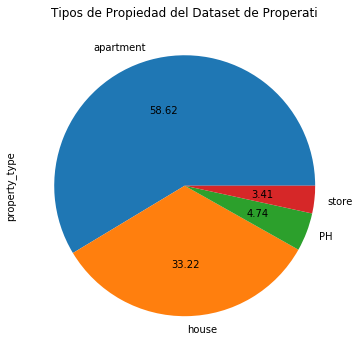

In [12]:
#Aldo_20200714_07:42
#Graficar la relación de los valores de la columna 'property_type'
#plot_bar = data.property_type.value_counts().plot(kind='bar',title='Tipos de Propiedad del Dataset de Properati')
print("--- ### ---")
print("Graficamos la distribución de los valores de la columna \'property_type\'.\n")
plot_pie = data.property_type.value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tipos de Propiedad del Dataset de Properati')

In [13]:
#Aldo_20200714_08:00 (celda modificada)
#Crear una nueva columna con el nombre '_tipo_propiedad' con solo los valores a considerar: 'apartment' y 'house'
#Convertir la nueva columna como un variable categórica para mejorar la performance del tratamiento del DataFrame
data['_tipo_propiedad'] = data.property_type[data.property_type.isin(['apartment','house'])].astype('category')
print("--- ### ---")
print("Comprobamos los valores de la nueva columna \'_tipo_propiedad\', convertida a tipo \'category\', mejorando su performance.\n")
print(data._tipo_propiedad)

--- ### ---
Comprobamos los valores de la nueva columna '_tipo_propiedad', convertida a tipo 'category', mejorando su performance.

0               NaN
1         apartment
2         apartment
3               NaN
4         apartment
            ...    
121215    apartment
121216        house
121217    apartment
121218    apartment
121219    apartment
Name: _tipo_propiedad, Length: 121220, dtype: category
Categories (2, object): [apartment, house]


In [14]:
#Determinar el tipo de dato de la columna place_name
print(f"El tipo de dato de la columna \'place_name\' es: {data.place_name.dtype}.") 
#out->El tipo de dato de la columna 'place_name' es: object.

#Evaluar la columna place_name
print("--- ### ---")
print(data.place_name.values)
#out->['Mataderos' 'La Plata' 'Mataderos' ... 'Villa Urquiza' 'Plaza Colón' 'Capital Federal']

#Determinar todos los valores de la columna place_name
place_name_value_unique = pd.unique(data.place_name)
#Verificar los valores de la columna place_name
print("--- ### ---")
print(f"Los valores de la columna \'place_name\' son: {place_name_value_unique}.") 
#out->Los valores de la columna 'place_name' son: ['Mataderos' 'La Plata' 'Liniers' ... 'Laguna Paiva' 'Malabrigo' 'Altos de Hudson I'].

#Determinar la cantidad de valores únicos
print("--- ### ---")
print(f"Cantidad de valores únicos de la columna \'place_name\' es {place_name_value_unique.shape[0]}.") 
#out->Cantidad de valores únicos de la columna 'place_name' es 1061.

#Crear una Serie a partir de los valores únicos para faciliar su evaluación
serie_place_name = pd.Series(place_name_value_unique)
#Verificar si existen valores duplicados
print("--- ### ---")
print(f"Existe la cantidad de {serie_place_name.duplicated(keep=False).sum()} valores duplicados en la columna \'place_name\'.")
#out->Existe la cantidad de 0 valores duplicados en la columna 'place_name'.

serie_place_name.sort_values(ascending = True)
#Verificar valores NA (Not applicable)
print("--- ### ---")
print(f"Existen {serie_place_name.isna().sum()} valores NA en la columna \'place_name'.")
#out->Existen 1 valores NA en la columna 'place_name'.

#Verificar valores NULL (Nulos)
print("--- ### ---")
print(f"Existen {serie_place_name.isnull().sum()} valores NULL en la columna \'place_name'.")
#out->Existen 1 valores NULL en la columna 'place_name'.

#Verificar el orden ascendente / descendente de la serie
print("--- ### ---")
print("--- Control de valores ordenados ---")
print(serie_place_name.sort_values(ascending = True))

#Eliminar los espacios en blanco al principio y al final de la serie.
print("--- ### ---")
print("--- Control de valores ordenados eliminando espacios al principio y al final ---")
print(serie_place_name.str.strip().sort_values(ascending = True))

El tipo de dato de la columna 'place_name' es: object.
--- ### ---
['Mataderos' 'La Plata' 'Mataderos' ... 'Villa Urquiza' 'Plaza Colón'
 'Capital Federal']
--- ### ---
Los valores de la columna 'place_name' son: ['Mataderos' 'La Plata' 'Liniers' ... 'Laguna Paiva' 'Malabrigo'
 'Altos de Hudson I'].
--- ### ---
Cantidad de valores únicos de la columna 'place_name' es 1061.
--- ### ---
Existe la cantidad de 0 valores duplicados en la columna 'place_name'.
--- ### ---
Existen 1 valores NA en la columna 'place_name'.
--- ### ---
Existen 1 valores NULL en la columna 'place_name'.
--- ### ---
--- Control de valores ordenados ---
785     Country Maschwitz Club
714                 los alamos
741                 9 de Abril
176                     Abasto
397        Abril Club de Campo
                ...           
770                     Zelaya
234                     Zárate
447      coordenadas 34.255511
590                    Álvarez
412                        NaN
Length: 1061, dtype: object

In [15]:
#Columna place_with_parent_names
#Determinar el tipo de dato de la columna place_with_parent_names
print(f"El tipo de dato de la columna \'place_with_parent_names\' es: {data.place_with_parent_names.dtype}.") 
#out->El tipo de dato de la columna 'place_with_parent_names' es: object.

#Evaluar la columna place_with_parent_names
print("--- ### ---")
print(data.place_with_parent_names.values)
#out->['|Argentina|Capital Federal|Mataderos|'
# '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
# '|Argentina|Capital Federal|Mataderos|' ...
# '|Argentina|Capital Federal|Villa Urquiza|'
# '|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|'
# '|Argentina|Capital Federal|']

#Determinar todos los valores de la columna place_with_parent_names
place_with_parent_names_value_unique = pd.unique(data.place_with_parent_names)
#Verificar los valores de la columna place_with_parent_names
print("--- ### ---")
print(f"Los valores de la columna \'place_with_parent_names\' son: {place_with_parent_names_value_unique}.") 
#out->Los valores de la columna 'place_with_parent_names' son: ['|Argentina|Capital Federal|Mataderos|'
# '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
# '|Argentina|Capital Federal|Liniers|' ...
# '|Argentina|Santa Fe|Laguna Paiva|' '|Argentina|Santa Fe|Malabrigo|'
# '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|'].

#Determinar la cantidad de valores únicos
print("--- ### ---")
print(f"Cantidad de valores únicos de la columna \'place_with_parent_names\' es {place_with_parent_names_value_unique.shape[0]}.") 
#out->Cantidad de valores únicos de la columna 'place_with_parent_names' es 1164.

#Crear una Serie a partir de los valores únicos para faciliar su evaluación
serie_place_with_parent_names = pd.Series(place_with_parent_names_value_unique)
#Verificar si existen valores duplicados
print("--- ### ---")
print(f"Existe la cantidad de {serie_place_with_parent_names.duplicated(keep=False).sum()} valores duplicados en la columna \'place_with_parent_name\'.")
#out->Existe la cantidad de 0 valores duplicados en la columna 'place_with_parent_name'.

serie_place_with_parent_names.sort_values(ascending = True)
#Verificar valores NA (Not applicable)
print("--- ### ---")
print(f"Existen {serie_place_with_parent_names.isna().sum()} valores NA en la columna \'place_with_parent_names'.")
#out->Existen 0 valores NA en la columna 'place_with_parent_names'.

#Verificar valores NULL (Nulos)
print("--- ### ---")
print(f"Existen {serie_place_with_parent_names.isnull().sum()} valores NULL en la columna \'place_with_parent_names'.")
#out->Existen 0 valores NULL en la columna 'place_with_parent_names'.

#Verificar el orden ascendente / descendente de la serie
print("--- ### ---")
print("--- Control de valores ordenados ---")
print(serie_place_with_parent_names.sort_values(ascending = True))

#Eliminar los espacios en blanco al principio y al final de la serie.
print("--- ### ---")
print("--- Control de valores ordenados eliminando espacios al principio y al final ---")
print(serie_place_with_parent_names.str.strip().sort_values(ascending = True))

#Visualizar los valores de la columna 'place_with_parent_names'
print("--- ### ---")
print("--- Muestreo de (50) valores de la columna 'place_with_parent_names' antes su tratamiento ---")
print(data.place_with_parent_names.sample(50))
print("-->>>")
print("-->>> Decisión: Crearemos cuatro(4) nuevas columnas a partir de esta columna para un análisis detallado.")
print("-->>>")

#Dividir la columna 'place_with_parent_names' en nuevas columnas
df_ubicacion = pd.DataFrame(data.place_with_parent_names.str.split('|').tolist())
print("--- ### ---")
print("Creamos la columna \'_pais\'")
data['_pais'] = df_ubicacion.iloc[:,1]
print(data._pais)

print("--- ### ---")
print("Creamos la columna \'_provincia_zona\'")
data['_provincia_zona'] = df_ubicacion.iloc[:,2]
print(data._provincia_zona)

print("--- ### ---")
print("Creamos la columna \'_localidad_barrio\'")
data['_localidad_barrio'] = df_ubicacion.iloc[:,3]
print(data._localidad_barrio)

print("--- ### ---")
print("Creamos la columna \'_lugar\'")
data['_lugar'] = df_ubicacion.iloc[:,4]
print(data._lugar)

print("--- ### ---")
print("Verificamos las columnas del DF.")
print(data)


El tipo de dato de la columna 'place_with_parent_names' es: object.
--- ### ---
['|Argentina|Capital Federal|Mataderos|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
 '|Argentina|Capital Federal|Mataderos|' ...
 '|Argentina|Capital Federal|Villa Urquiza|'
 '|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Plaza Colón|'
 '|Argentina|Capital Federal|']
--- ### ---
Los valores de la columna 'place_with_parent_names' son: ['|Argentina|Capital Federal|Mataderos|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
 '|Argentina|Capital Federal|Liniers|' ...
 '|Argentina|Santa Fe|Laguna Paiva|' '|Argentina|Santa Fe|Malabrigo|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|'].
--- ### ---
Cantidad de valores únicos de la columna 'place_with_parent_names' es 1164.
--- ### ---
Existe la cantidad de 0 valores duplicados en la columna 'place_with_parent_name'.
--- ### ---
Existen 0 valores NA en la columna 'place_with_parent_names'.
--- ### ---
Existen 0 valores NULL en la co

In [17]:
#Visualizar los datos para comprobar los cambios realizados.
data

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,description,title,image_thumbnail,_id,_delete,_tipo_propiedad,_pais,_provincia_zona,_localidad_barrio,_lugar
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,NaN,NaN,Argentina,Capital Federal,Mataderos,
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,2,NaN,apartment,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,3,NaN,apartment,Argentina,Capital Federal,Mataderos,
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,4,NaN,NaN,Argentina,Capital Federal,Liniers,
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,5,NaN,apartment,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,121216,NaN,apartment,Argentina,Capital Federal,Belgrano,
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,121217,NaN,house,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,121218,NaN,apartment,Argentina,Capital Federal,Villa Urquiza,
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,121219,NaN,apartment,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón


In [18]:
#Definir de los valores únicos que contienen Capital Federal
cant_valores_capital_federal = data[data.place_with_parent_names.str.contains('Capital Federal',case = False)].count()
#Definir el total de valores únicos
cant_valores_totales = data.place_with_parent_names.count()
#Determinar el porcentaje de valores de Capital Federal en el total
print(f"El porcentaje de barrios de Capital Federal es:\n{(cant_valores_capital_federal / cant_valores_totales * 100).round(2)}%")


El porcentaje de barrios de Capital Federal es:
Unnamed: 0                    26.66
operation                     26.66
property_type                 26.66
place_name                    26.66
place_with_parent_names       26.66
country_name                  26.66
state_name                    26.66
geonames_id                   25.60
lat-lon                       19.61
lat                           19.61
lon                           19.61
price                         23.94
currency                      23.94
price_aprox_local_currency    23.94
price_aprox_usd               23.94
surface_total_in_m2           21.81
surface_covered_in_m2         24.73
price_usd_per_m2              19.33
price_per_m2                  22.54
floor                          2.48
rooms                         12.64
expenses                       5.44
properati_url                 26.66
description                   26.66
title                         26.66
image_thumbnail               26.26
_id             

--- ### ---
La estadística de la columna 'price' es:
count    1.008100e+05
mean     4.685259e+05
std      2.260101e+06
min      0.000000e+00
25%      1.100000e+05
50%      1.850000e+05
75%      4.200000e+05
max      6.500000e+08
Name: price, dtype: float64
--- ### ---
La columna 'price' tiene 20410 valores Nan, es decir un 16.84%
--- ### ---
El valor máximo de la columna 'price' es 650000000.0
--- ### ---
El valor mínimo de la columna 'price' es 0.0
--- ### ---
*** Gráfico boxplot de Tipo de Propiedad (apartment|house) vs precio ***
Podemos observar que existe un valor atípico para el tipo de propiedad 'house' con valor 650000000.0


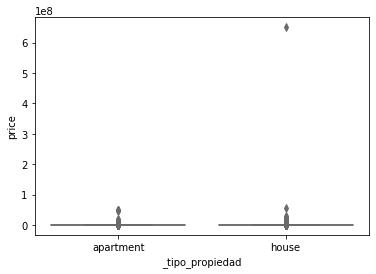

In [19]:
#Analizar la columna 'price'
#Analizar las estadísticas de la columna 'price'
print("--- ### ---")
print("La estadística de la columna \'price\' es:")
print(data.price.describe())

precio_isna = pd.Series(data.price).isna().sum()
print("--- ### ---")
print(f"La columna \'price\' tiene {precio_isna} valores Nan, es decir un {(precio_isna / filas_totales * 100).round(2)}%")
#out->La columna 'price' tiene 20410 valores Nan, es decir un 16.84%

#Calcular el valor máximo y mínimo 
print("--- ### ---")
print(f"El valor máximo de la columna \'price\' es {data.agg({'price':'max'})[0]}")
#out->El valor máximo de la columna 'price' es 650000000.0

print("--- ### ---")
print(f"El valor mínimo de la columna \'price\' es {data.agg({'price':'min'})[0]}")
#out->El valor mínimo de la columna 'price' es 0.0

#Evaluar el precio en función al tipo de propiedad, considerando solo 'apartment' y 'house'
tipo_propiedad_valores = ['apartment' , 'house']|
#Crear la máscara aplicando a la lista
data_tipo_propiedad_mask = data.property_type.apply(lambda x : x in tipo_propiedad_valores)
#Crear un nuevo DF con la máscara aplicada
data_tipo_propiedad = data.loc[data_tipo_propiedad_mask,:]
#Dibujar el boxplot
print("--- ### ---")
print("*** Gráfico boxplot de Tipo de Propiedad (apartment|house) vs precio ***")
sns.boxplot("_tipo_propiedad","price", data = data_tipo_propiedad, palette="Set3")

#Analizar el boxplot de la columna price
print(f"Podemos observar que existe un valor atípico para el tipo de propiedad \'house\' con valor {data_tipo_propiedad.agg({'price':'max'})[0]}")
#out->Podemos observar que existe un valor atípico para el tipo de propiedad 'house' con valor 650000000.0


In [20]:
##Evaluar el precio en función al _provincia_zona, considerando solo 'Capital Federal'
#provincia_zona_valores = ['Capital Federal']
##Crear la máscara aplicando a la lista
#data_provincia_zona_mask = data._provincia_zona.apply(lambda x : x in provincia_zona_valores)
##Crear un nuevo DF con la máscara aplicada
#data_provincia_zona = data.loc[data_provincia_zona_mask,:]
##Dibujar el boxplot
#print("--- ### ---")
#print("*** Gráfico boxplot de Tipo de Propiedad (apartment|house) vs precio ***")
#sns.catplot(x="_provincia_zona","_tipo_propiedad","price", data = data_provincia_zona, palette="Set3")

In [21]:
#Analizar la columna 'currency'
currency_isna = pd.Series(data.currency).isna().sum()
print("--- ### ---")
print(f"La columna \'currency\' tiene {currency_isna} valores Nan, es decir un {(currency_isna / filas_totales * 100).round(2)}%")
#out->La columna 'currency' tiene 20411 valores Nan, es decir un 16.84%

#Determinar el tipo de dato de la columna currency
print("--- ### ---")
print(f"El tipo de dato de la columna \'currency\' es: {data.currency.dtype}.") 
#out->El tipo de dato de la columna 'currency' es: object.

#Evaluar la columna currency
print("--- ### ---")
print("Muestra de valores de la columna currency.")
print(data.currency.values)

#Determinar todos los valores de la columna currency
currency_value_unique = pd.unique(data.currency)

#Verificar los valores de la columna currency
print("--- ### ---")
print(f"Los valores de la columna \'currency\' son: {currency_value_unique}.") 
#out->Los valores de la columna 'currency' son: ['USD' nan 'ARS' 'PEN' 'UYU'].

#Determinar la cantidad de valores únicos
print("--- ### ---")
print(f"Cantidad de valores únicos de la columna \'currency\' es {currency_value_unique.shape[0]}.") 
#out->Cantidad de valores únicos de la columna 'currency' es 5.

#Analizamos el valor nan de la columna 'currency'
moneda_null_count = pd.Series(data.currency.isnull).count()
print("--- ### ---")
print(f"La cantidad de filas que con valor NULL en la columna \'currency\' es: {moneda_null_count}.")

print("-->>>")
print("-->>> Decisión: Debemos imputar el único valor NULL del campo \'currency\'.")
print("-->>>")

--- ### ---
La columna 'currency' tiene 20411 valores Nan, es decir un 16.84%
--- ### ---
El tipo de dato de la columna 'currency' es: object.
--- ### ---
Muestra de valores de la columna currency.
['USD' 'USD' 'USD' ... 'USD' 'USD' 'USD']
--- ### ---
Los valores de la columna 'currency' son: ['USD' nan 'ARS' 'PEN' 'UYU'].
--- ### ---
Cantidad de valores únicos de la columna 'currency' es 5.
--- ### ---
La cantidad de filas que con valor NULL en la columna 'currency' es: 1.
-->>>
-->>> Decisión: Debemos imputar el único valor NULL del campo 'currency'.
-->>>


In [22]:
#Aldo_20200713_23:30
#Limpiar la columna '_provincia_zona' para disponer solo del valor 'capital federal'
#Normalizar los valores de la columna para su tratamiento en minúscula
data['_provincia_zona'] = data['_provincia_zona'].str.lower()

#Utilizar una lista de valores
provincia_zona_cf = ['capital federal']
#Aplicar el valor buscado en caso de éxito imputar el valor sino imputar None
data._provincia_zona = data._provincia_zona.apply(lambda x : x if x in provincia_zona_cf else None)

print("--- ### ---")
print(f"Se comprueban los valores de la columna \'_provincia_zona\'. La cantidad de filas consideradas son: {len(data._provincia_zona.notnull())}.")
print(data._provincia_zona)

--- ### ---
Se comprueban los valores de la columna '_provincia_zona'. La cantidad de filas consideradas son: 121220.
0         capital federal
1                    None
2         capital federal
3         capital federal
4                    None
               ...       
121215    capital federal
121216               None
121217    capital federal
121218               None
121219    capital federal
Name: _provincia_zona, Length: 121220, dtype: object


In [23]:
#Aldo_20200714_00:30
#Aplicar la condición de filtro conteniendo los valores no eliminados lógicamente, que tiene un tipo de propiedad correcto y son de Capital Federal
condicion_filtro = (data._delete.isnull()) & (data._tipo_propiedad.notnull()) & (data._provincia_zona.notnull())
#Crear un nuevo DataFrame 'data_dh_cf' al cual se le realizará el Data Wrangling -- dh_cf = department|house|capital federal
data_dh_cf = data[condicion_filtro]
data_dh_cf
print("--- ### ---")
print(f"Se comprueba la validez de las columnas filtradas: \'_delete\', \'_tipo_propiedad\' y \'_provincia_zona\'. La cantidad de filas consideradas son: {len(data_dh_cf)}.\n")
print(data_dh_cf)

#Copiar el archivo csv con el filtro principal pero sin borrado de filas
print("--- ### ---")
print(f"Se realiza una copia del DataFrame con los filtros aplicados")
data_dh_cf.to_csv(path_name + '\properati_copia_02_filtros_sin_borrado.csv')

--- ### ---
Se comprueba la validez de las columnas filtradas: '_delete', '_tipo_propiedad' y '_provincia_zona'. La cantidad de filas consideradas son: 29124.

        Unnamed: 0 operation property_type       place_name  \
2                2      sell     apartment        Mataderos   
7                7      sell     apartment         Belgrano   
8                8      sell     apartment         Belgrano   
13              13      sell     apartment     Palermo Soho   
14              14      sell     apartment     Palermo Soho   
...            ...       ...           ...              ...   
121160      121160      sell     apartment         Belgrano   
121209      121209      sell     apartment         Belgrano   
121215      121215      sell     apartment         Belgrano   
121217      121217      sell     apartment    Villa Urquiza   
121219      121219      sell     apartment  Capital Federal   

                                 place_with_parent_names country_name  \
2         

In [101]:
#Aldo_20200715_08:30
#Tratamiento de columna '_localidad_barrio' 
#Crear una agrupación por la columna '_localidad_barrio' para determinar los distintos grupos
_localidad_barrio_agrupada = data_dh_cf.groupby('_localidad_barrio').count()
print("--- ### ---")
print(f"Existen 58 grupos de barrios de Capital Federal, incluyendo el grupo \'vacío\'.\n")
#print(f"{_localidad_barrio_agrupada.iloc[:,[0]]}")

print("--- ### ---")
_localidad_barrio_agrupada_vacio = pd.DataFrame(_localidad_barrio_agrupada.iloc[0]).iloc[1]
_localidad_barrio_agrupada_completo = pd.DataFrame(_localidad_barrio_agrupada).sum().iloc[1]
_localidad_barrio_agrupada_vacio_porc = _localidad_barrio_agrupada_vacio / _localidad_barrio_agrupada_completo * 100
print(f"El porcentaje de valores vacío con respecto al total de registros considerados es: {_localidad_barrio_agrupada_vacio_porc.iloc[0].round(2)}%.")

print("-->>>")
print("-->>> Decisión: No se consierarán los valores nulos de la columna \'_localidad_barrio\', ya que su impacto no es significativo en esta primera etapa.")
print("-->>>")

#Crear un nuevo DataFrame 'data_dh_cf_ba' al cual se le realizará el Data Wrangling -- dh_cf = department|house|capital federal con _localidad_barrio no vacío
data_dh_cf_ba = data_dh_cf[data_dh_cf['_localidad_barrio'].isin([''])==False]
print("--- ### ---")
print(f"El nuevo conjunto de datos (DataFrame) con los filtros aplicados se renombra como \'data_dh_cf_ba\' contiene {data_dh_cf_ba.shape[0]} filas.")
print("--- ### ---")
data_dh_cf_ba

--- ### ---
Existen 58 grupos de barrios de Capital Federal, incluyendo el grupo 'vacío'.

--- ### ---
El porcentaje de valores vacío con respecto al total de registros considerados es: 3.92%.
-->>>
-->>> Decisión: No se consierarán los valores nulos de la columna '_localidad_barrio', ya que su impacto no es significativo en esta primera etapa.
-->>>
--- ### ---
El nuevo conjunto de datos (DataFrame) con los filtros aplicados se renombra como 'data_dh_cf_ba' contiene 27981 filas.
--- ### ---


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,description,title,image_thumbnail,_id,_delete,_tipo_propiedad,_pais,_provincia_zona,_localidad_barrio,_lugar
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,3,NaN,apartment,Argentina,capital federal,Mataderos,
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,8,NaN,apartment,Argentina,capital federal,Belgrano,
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,9,NaN,apartment,Argentina,capital federal,Belgrano,
13,13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,Torre I Mondrian. 3 ambientes con terraza y d...,Vitraux Palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcU...,14,NaN,apartment,Argentina,capital federal,Palermo,Palermo Soho
14,14,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,3430234.0,NaN,NaN,...,Torre II Dalí. Ambiente unico divisible.Vitrau...,Vitraux Palermo,https://thumbs4.properati.com/8/Uay2dC732CNlRw...,15,NaN,apartment,Argentina,capital federal,Palermo,Palermo Soho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121158,121158,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.587425443,-58.3973722534",-34.587425,...,Excelente Ubicación - Avenida Pueyrredon y Las...,Departamento - Recoleta,https://thumbs4.properati.com/1/O847ZBAPkkdt0a...,121159,NaN,apartment,Argentina,capital federal,Recoleta,
121160,121160,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,121161,NaN,apartment,Argentina,capital federal,Belgrano,
121209,121209,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563685346,-58.4426825896",-34.563685,...,Edificio en esquina de muy buena categoría de ...,Av .Luis Maria Campos 1400- Belgrano-Capital F...,https://thumbs4.properati.com/0/zeLNBuyylOJL7z...,121210,NaN,apartment,Argentina,capital federal,Belgrano,
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,121216,NaN,apartment,Argentina,capital federal,Belgrano,
